Поддерживаемые символы: ['(', ')', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 't', 'x', 'y', ',', '+', '-', '*']
Создаем цепочку: (5*t
Создаем цепочку: *6+6
Создаем цепочку: +(7(


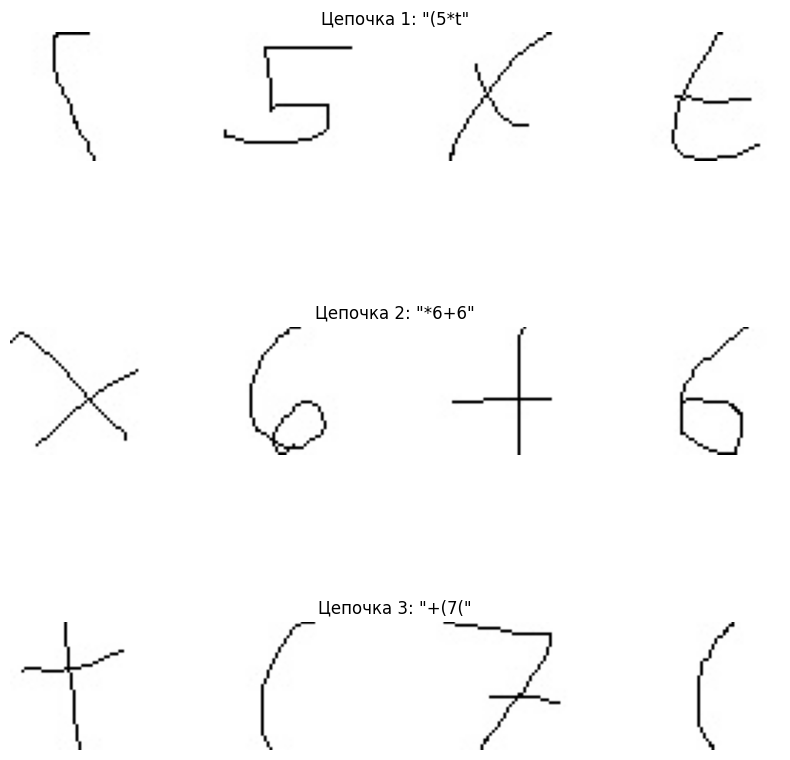

Обрабатываем цепочку 1: '(5*t'


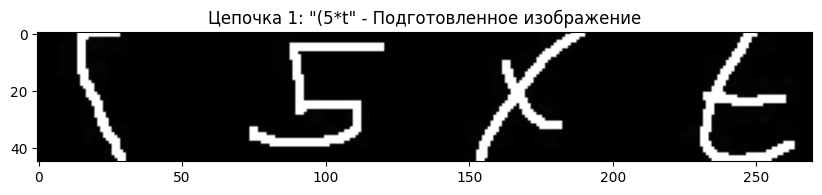

Размер бинарного изображения: (45, 270, 3)


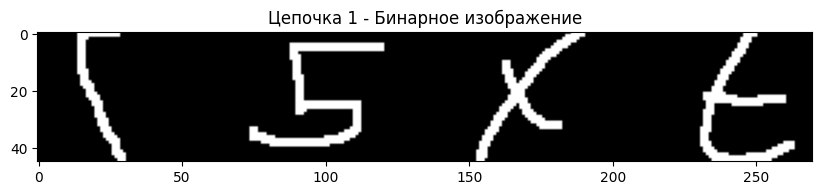

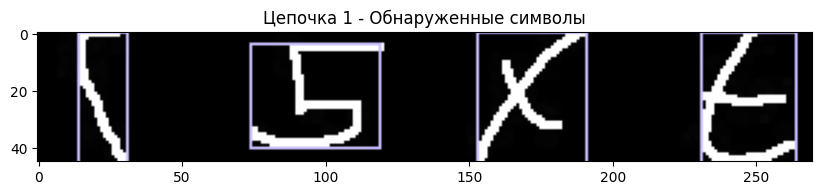

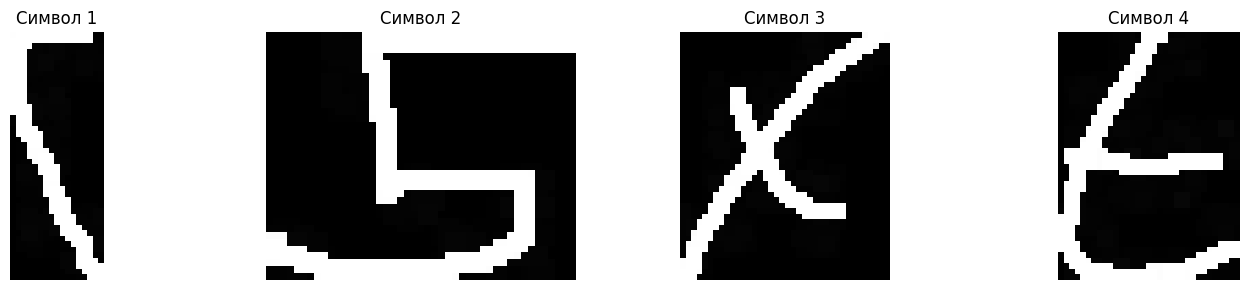


=== Текущее состояние данных (после цепочки 1) ===
Цепочка 1: '(5*t', символов: 4
  Символ 1: x=14, размер=(45, 17)
  Символ 2: x=74, размер=(36, 45)
  Символ 3: x=153, размер=(45, 38)
  Символ 4: x=231, размер=(45, 33)
Обработка цепочки 1 завершена. Найдено символов: 4

Обрабатываем цепочку 2: '*6+6'


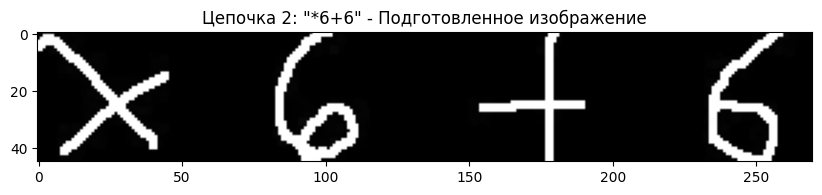

Размер бинарного изображения: (45, 270, 3)


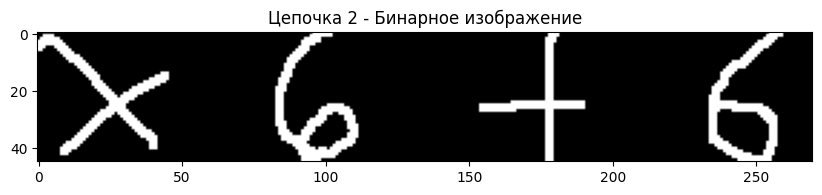

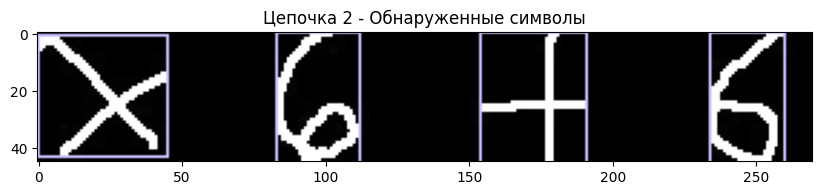

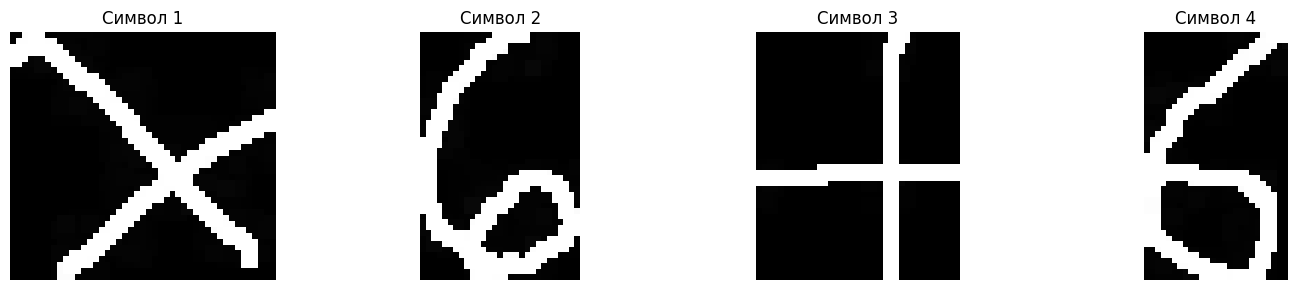


=== Текущее состояние данных (после цепочки 2) ===
Цепочка 1: '(5*t', символов: 4
  Символ 1: x=14, размер=(45, 17)
  Символ 2: x=74, размер=(36, 45)
  Символ 3: x=153, размер=(45, 38)
  Символ 4: x=231, размер=(45, 33)
Цепочка 2: '*6+6', символов: 4
  Символ 1: x=0, размер=(42, 45)
  Символ 2: x=83, размер=(45, 29)
  Символ 3: x=154, размер=(45, 37)
  Символ 4: x=234, размер=(45, 26)
Обработка цепочки 2 завершена. Найдено символов: 4

Обрабатываем цепочку 3: '+(7('


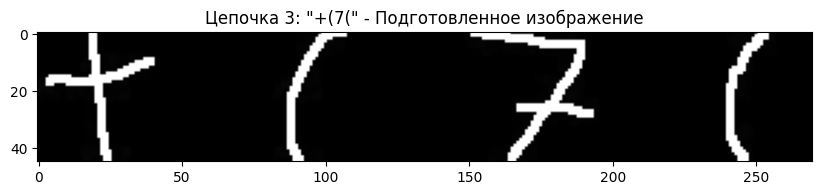

Размер бинарного изображения: (45, 270, 3)


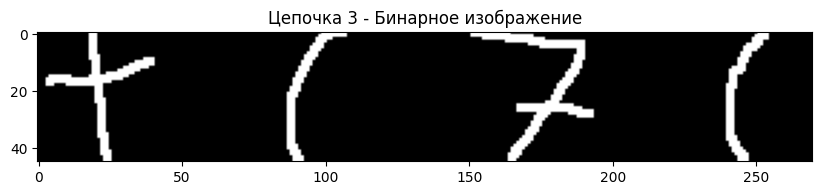

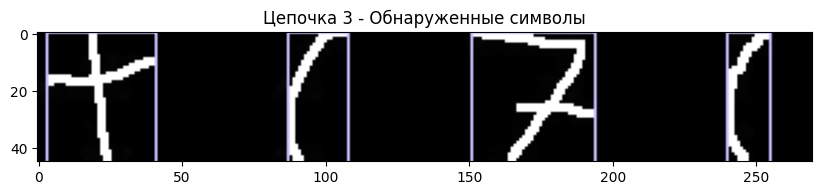

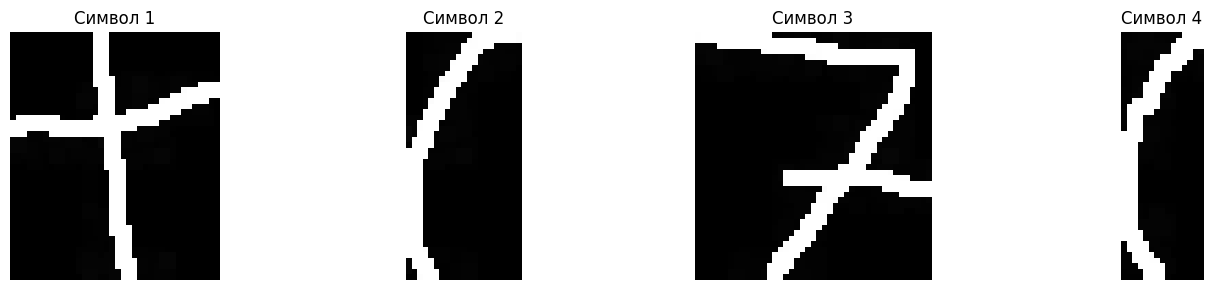


=== Текущее состояние данных (после цепочки 3) ===
Цепочка 1: '(5*t', символов: 4
  Символ 1: x=14, размер=(45, 17)
  Символ 2: x=74, размер=(36, 45)
  Символ 3: x=153, размер=(45, 38)
  Символ 4: x=231, размер=(45, 33)
Цепочка 2: '*6+6', символов: 4
  Символ 1: x=0, размер=(42, 45)
  Символ 2: x=83, размер=(45, 29)
  Символ 3: x=154, размер=(45, 37)
  Символ 4: x=234, размер=(45, 26)
Цепочка 3: '+(7(', символов: 4
  Символ 1: x=3, размер=(45, 38)
  Символ 2: x=87, размер=(45, 21)
  Символ 3: x=151, размер=(45, 43)
  Символ 4: x=240, размер=(45, 15)
Обработка цепочки 3 завершена. Найдено символов: 4


ВСЕ ОБРАБОТАННЫЕ ЦЕПОЧКИ:
1. '(5*t' - 4 символов
2. '*6+6' - 4 символов
3. '+(7(' - 4 символов
Обучающая выборка: 180225 изображений
Модель KNN с k=1 обучена!
Модель KNN с k=3 обучена!
Модель KNN с k=5 обучена!
Модель KNN с k=7 обучена!


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from sklearn.neighbors import KNeighborsClassifier

# TASK 1: Создание изображения с цепочкой символов

class CharacterImageCreator:
    def __init__(self, dataset_directory):
        self.dataset_directory = dataset_directory
        self.character_mapping = {
            '(': '(', ')': ')',
            '0': '0', '1': '1', '2': '2', '3': '3', '4': '4', 
            '5': '5', '6': '6', '7': '7', '8': '8', '9': '9',
            't': 't', 'x': 'X', 'y': 'y', ',': ',',
            '+': '+', '-': '-', '*': '*'
        }
        self.supported_characters = list(self.character_mapping.keys())
        print("Поддерживаемые символы:", self.supported_characters)
        
    def fetch_character_image(self, character):
        folder_name = self.character_mapping[character]
        character_folder = os.path.join(self.dataset_directory, folder_name)
        
        image_files = [f for f in os.listdir(character_folder) if os.path.isfile(os.path.join(character_folder, f))]
        image_files.sort()
        
        split_index = int(len(image_files) * 0.8)
        validation_images = image_files[split_index:]
        
        selected_image = random.choice(validation_images)
        image_path = os.path.join(character_folder, selected_image)
        
        image_data = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)    
        return image_data
    
    def create_character_chain(self, chain_length=4):
        character_chain = ''.join(random.choices(self.supported_characters, k=chain_length))
        print(f"Создаем цепочку: {character_chain}")
        character_images = []
        
        for char in character_chain:
            char_image = self.fetch_character_image(char)
            if char_image is not None:
                character_images.append(char_image)
        
        return character_chain, character_images

# Инициализация генератора
image_creator = CharacterImageCreator('./data')

def combine_images_horizontally(image_list, gap=20):
    total_width = sum(img.shape[1] for img in image_list) + gap * (len(image_list) - 1)
    max_height = max(img.shape[0] for img in image_list)
    
    combined_image = np.ones((max_height, total_width), dtype=np.uint8) * 255
    
    current_x = 0
    for img in image_list:
        height, width = img.shape
        y_start = (max_height - height)
        combined_image[y_start:y_start+height, current_x:current_x+width] = img
        current_x += width + gap
    
    return combined_image

# Генерация последовательностей
generated_sequences = []
generated_image_sets = []

for idx in range(3):
    sequence, images = image_creator.create_character_chain(chain_length=4)
    generated_sequences.append(sequence)
    generated_image_sets.append(images)  

final_combined_images = []

for image_set in generated_image_sets:  
    combined_img = combine_images_horizontally(image_set, gap=30)
    final_combined_images.append(combined_img)

# Визуализация результатов
figure, axes = plt.subplots(3, 1, figsize=(8, 10))

for idx, (image_data, sequence_text) in enumerate(zip(final_combined_images, generated_sequences)):
    axes[idx].imshow(image_data, cmap='gray')
    axes[idx].set_title(f'Цепочка {idx+1}: "{sequence_text}"')
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

def center_crop_image(input_image, target_dimension=45):
    height, width = input_image.shape
    
    square_image = np.zeros((target_dimension, target_dimension), dtype=np.uint8)
    
    vertical_offset = (target_dimension - height) // 2
    horizontal_offset = (target_dimension - width) // 2
    
    square_image[vertical_offset:vertical_offset+height, horizontal_offset:horizontal_offset+width] = input_image
    return square_image

# Основной блок обработки изображений
processed_sequences_data = []

for img_index, source_image in enumerate(final_combined_images):
    print(f"Обрабатываем цепочку {img_index + 1}: '{generated_sequences[img_index]}'")
    
    processed_image = source_image.copy()
    structuring_element = np.ones((3,3), np.uint8)
    processed_image = cv2.erode(processed_image, structuring_element, iterations=1)
    processed_image = cv2.bitwise_not(processed_image)
    
    base_dimensions = processed_image.shape[0], processed_image.shape[1]
    base_image = np.zeros(base_dimensions, dtype=np.uint8)
    base_image[0:processed_image.shape[0], 0:processed_image.shape[1]] = processed_image
    base_image = cv2.cvtColor(base_image, cv2.COLOR_GRAY2RGB)

    rgb_image = base_image

    plt.figure(figsize=(10, 3))
    plt.imshow(rgb_image)
    plt.title(f'Цепочка {img_index + 1}: "{generated_sequences[img_index]}" - Подготовленное изображение')
    plt.show()
    
    threshold_value, binary_image = cv2.threshold(rgb_image, 127, 255, 0)
    print(f"Размер бинарного изображения: {binary_image.shape}")
    
    plt.figure(figsize=(10, 3))
    binary_image = np.uint8(binary_image)
    plt.imshow(binary_image)
    plt.title(f'Цепочка {img_index + 1} - Бинарное изображение')
    plt.show()
    
    detected_contours, hierarchy = cv2.findContours(binary_image[:,:,0], cv2.RETR_EXTERNAL, 2)
    character_bboxes = []

    # Сортировка контуров по горизонтали
    detected_contours = sorted(detected_contours, key=lambda contour: cv2.boundingRect(contour)[0])

    for contour_idx in range(len(detected_contours)):
        current_contour = detected_contours[contour_idx]
        contour_area = cv2.contourArea(current_contour)
        x_pos, y_pos, width, height = cv2.boundingRect(current_contour)
        
        while (width > 45):
            width -= 1
        
        if width * height > 50:
            cv2.rectangle(rgb_image, (x_pos, y_pos), (x_pos+width, y_pos+height), (203,192,255), 1)
            character_bboxes.append([x_pos, y_pos, width, height]) 
    
    plt.figure(figsize=(10, 3))
    plt.imshow(rgb_image)
    plt.title(f'Цепочка {img_index + 1} - Обнаруженные символы')
    plt.show()
    
    extracted_characters = []
    # Визуализация извлеченных символов
    fig, axes = plt.subplots(1, len(character_bboxes), figsize=(15, 3))
    if len(character_bboxes) == 1:
        axes = [axes]
    
    for bbox_idx in range(len(character_bboxes)):
        x_pos, y_pos, width, height = character_bboxes[bbox_idx]        
        char_image = processed_image[y_pos:y_pos+height, x_pos:x_pos+width]
        char_data = char_image.copy()

        axes[bbox_idx].imshow(char_data, cmap="gray")
        axes[bbox_idx].set_title(f'Символ {bbox_idx+1}')
        axes[bbox_idx].axis('off')
        extracted_characters.append((x_pos, char_data))
    
    plt.tight_layout()
    plt.show()
    
    processed_sequences_data.append({
        'sequence_text': generated_sequences[img_index],
        'characters': extracted_characters
    })
    
    print(f"\n=== Текущее состояние данных (после цепочки {img_index + 1}) ===")
    for seq_idx, sequence_info in enumerate(processed_sequences_data):
        print(f"Цепочка {seq_idx+1}: '{sequence_info['sequence_text']}', символов: {len(sequence_info['characters'])}")
        for char_idx, (x_coord, char_img) in enumerate(sequence_info['characters']):
            print(f"  Символ {char_idx+1}: x={x_coord}, размер={char_img.shape}")
    print("=" * 80)
    
    print(f"Обработка цепочки {img_index + 1} завершена. Найдено символов: {len(extracted_characters)}\n")

print("\nВСЕ ОБРАБОТАННЫЕ ЦЕПОЧКИ:")
for seq_idx, sequence_info in enumerate(processed_sequences_data):
    print(f"{seq_idx+1}. '{sequence_info['sequence_text']}' - {len(sequence_info['characters'])} символов")

# Функция для загрузки обучающих данных
def prepare_training_data(data_path, character_list, training_ratio=0.8):
    training_features, training_labels = [], []
    
    for character in character_list:
        char_path = os.path.join(data_path, character)
        image_list = [f for f in os.listdir(char_path) if os.path.isfile(os.path.join(char_path, f))]
        image_list.sort()
        
        split_point = int(len(image_list) * training_ratio)
        training_images = image_list[:split_point]
        
        for img_file in training_images:
            img_path = os.path.join(char_path, img_file)
            img_data = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img_data is not None:
                training_features.append(img_data.flatten())
                training_labels.append(character)
    
    return np.array(training_features), np.array(training_labels)

# Подготовка данных для обучения
character_set = ['0','1','2','3','4','5','6','7','8','9','+','-','*','t','X','y','w','h','(',')',',']

X_training, y_training = prepare_training_data('./data', character_set)
print(f"Обучающая выборка: {len(X_training)} изображений")

# Создание нескольких моделей KNN
neighbor_counts = [1, 3, 5, 7]
knn_models = {}

for k_val in neighbor_counts:
    classifier = KNeighborsClassifier(n_neighbors=k_val)
    classifier.fit(X_training, y_training)
    knn_models[k_val] = classifier
    print(f"Модель KNN с k={k_val} обучена!")

def classify_character(model, input_image):
    target_size = (45, 45)
    resized_image = cv2.resize(input_image, target_size)
    
    processed_image = cv2.bitwise_not(resized_image)
    flattened_image = processed_image.flatten()
    
    expected_features = model.n_features_in_
    if len(flattened_image) != expected_features:
        print(f"ВНИМАНИЕ: Размерность не совпадает! Ожидалось {expected_features}, получено {len(flattened_image)}")
    
    prediction_result = model.predict([flattened_image])
    return prediction_result[0]
    

In [10]:
# Сравнение производительности моделей
print("\n" + "=" * 80)
print("СРАВНИТЕЛЬНЫЙ АНАЛИЗ МОДЕЛЕЙ С РАЗНЫМИ K")
print("=" * 80)

performance_results = {}

for k_val, model in knn_models.items():
    print(f"\nРЕЗУЛЬТАТЫ ДЛЯ K={k_val}:")
    print("-" * 40)
    
    correct_predictions = 0
    total_characters = 0
    sequence_success = []
    
    for seq_idx, sequence_info in enumerate(processed_sequences_data):
        original_sequence = sequence_info['sequence_text']
        character_data = sequence_info['characters']
        
        print(f"\nЦепочка {seq_idx+1}:")
        print(f"Исходный текст: '{original_sequence}'")
        
        predicted_chars = []
        for char_idx, (x_coord, char_img) in enumerate(character_data):
            resized_char = cv2.resize(char_img, (45, 45))
            predicted_char = classify_character(model, resized_char)
            predicted_chars.append(predicted_char)
        
        predicted_sequence = ''.join(predicted_chars)
        print(f"Распознанный текст: '{predicted_sequence}'")
        
        correct_count = sum(1 for orig, pred in zip(original_sequence, predicted_sequence) if orig == pred)
        sequence_accuracy = correct_count / len(original_sequence)
        correct_predictions += correct_count
        total_characters += len(original_sequence)
        
        if original_sequence == predicted_sequence:
            print("✓ Полное совпадение")
            sequence_success.append(1.0)
        else:
            print("✗ Обнаружены расхождения")
            sequence_success.append(0.0)
            
            for pos, (orig_char, pred_char) in enumerate(zip(original_sequence, predicted_sequence)):
                if orig_char != pred_char:
                    print(f"   Ошибка в позиции {pos+1}: ожидалось '{orig_char}', получено '{pred_char}'")
    
    overall_accuracy = correct_predictions / total_characters if total_characters > 0 else 0
    performance_results[k_val] = {
        'accuracy': overall_accuracy,
        'sequence_success_rate': np.mean(sequence_success),
        'correct_chars': correct_predictions,
        'total_chars': total_characters
    }
    
    print(f"\nИтоги для k={k_val}:")
    print(f"  Правильно распознано: {correct_predictions}/{total_characters}")
    print(f"  Точность распознавания: {overall_accuracy:.2%}")
    print(f"  Полностью верных цепочек: {sum(sequence_success)}/{len(sequence_success)}")

# Анализ результатов и выбор оптимального параметра
print("\n" + "=" * 80)
print ("ОПРЕДЕЛЕНИЕ ОПТИМАЛЬНОГО ЗНАЧЕНИЯ K")
print("=" * 80)

optimal_k = None
highest_accuracy = 0

for k_val, result in performance_results.items():
    accuracy = result['accuracy']
    print(f"K={k_val}: Точность {accuracy:.2%} ({result['correct_chars']}/{result['total_chars']} символов)")
    
    if accuracy > highest_accuracy:
        highest_accuracy = accuracy
        optimal_k = k_val

print(f"\nВЫВОД: Наилучший результат при K={optimal_k} с точностью {highest_accuracy:.2%}")
print(f"РЕКОМЕНДАЦИЯ: Для данной задачи оптимальным является K={optimal_k}")


СРАВНИТЕЛЬНЫЙ АНАЛИЗ МОДЕЛЕЙ С РАЗНЫМИ K

РЕЗУЛЬТАТЫ ДЛЯ K=1:
----------------------------------------

Цепочка 1:
Исходный текст: '(5*t'
Распознанный текст: '55*-'
✗ Обнаружены расхождения
   Ошибка в позиции 1: ожидалось '(', получено '5'
   Ошибка в позиции 4: ожидалось 't', получено '-'

Цепочка 2:
Исходный текст: '*6+6'
Распознанный текст: '*6+6'
✓ Полное совпадение

Цепочка 3:
Исходный текст: '+(7('
Распознанный текст: '+(7('
✓ Полное совпадение

Итоги для k=1:
  Правильно распознано: 10/12
  Точность распознавания: 83.33%
  Полностью верных цепочек: 2.0/3

РЕЗУЛЬТАТЫ ДЛЯ K=3:
----------------------------------------

Цепочка 1:
Исходный текст: '(5*t'
Распознанный текст: '55*-'
✗ Обнаружены расхождения
   Ошибка в позиции 1: ожидалось '(', получено '5'
   Ошибка в позиции 4: ожидалось 't', получено '-'

Цепочка 2:
Исходный текст: '*6+6'
Распознанный текст: '*6+6'
✓ Полное совпадение

Цепочка 3:
Исходный текст: '+(7('
Распознанный текст: '+(7('
✓ Полное совпадение

Итоги для k=3: